## Saúl Martínez
### ADTA 5410 Applications and Deployment of Advanced Analytics
#### Final Research Project - Demographic Factors and College Completion

### Load the libraries

In [ ]:
# Essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data file

In [ ]:
# Read the CSV file
df = pd.read_csv('c2023_c.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16065 entries, 0 to 16064
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UNITID    16065 non-null  int64 
 1   AWLEVELC  16065 non-null  int64 
 2   XCSTOTLT  16065 non-null  object
 3   CSTOTLT   16065 non-null  int64 
 4   XCSTOTLM  16065 non-null  object
 5   CSTOTLM   16065 non-null  int64 
 6   XCSTOTLW  16065 non-null  object
 7   CSTOTLW   16065 non-null  int64 
 8   XCSAIANT  16065 non-null  object
 9   CSAIANT   16065 non-null  int64 
 10  XCSASIAT  16065 non-null  object
 11  CSASIAT   16065 non-null  int64 
 12  XCSBKAAT  16065 non-null  object
 13  CSBKAAT   16065 non-null  int64 
 14  XCSHISPT  16065 non-null  object
 15  CSHISPT   16065 non-null  int64 
 16  XCSNHPIT  16065 non-null  object
 17  CSNHPIT   16065 non-null  int64 
 18  XCSWHITT  16065 non-null  object
 19  CSWHITT   16065 non-null  int64 
 20  XCS2MORT  16065 non-null  object
 21

## Data Preparation - Remove Imputation (X) Code Columnns

In [ ]:
# Drop columns that start with 'X'
columns_to_drop = [col for col in df.columns if col.startswith('X')]
df_clean = df.drop(columns=columns_to_drop)

print(f"Columns dropped: {columns_to_drop}")
print(f"Cleaned dataset shape: {df_clean.shape}")

# Display the first few rows of the cleaned dataset
df_clean.head()


Columns dropped: ['XCSTOTLT', 'XCSTOTLM', 'XCSTOTLW', 'XCSAIANT', 'XCSASIAT', 'XCSBKAAT', 'XCSHISPT', 'XCSNHPIT', 'XCSWHITT', 'XCS2MORT', 'XCSUNKNT', 'XCSNRALT', 'XCSUND18', 'XCS18_24', 'XCS25_39', 'XCSABV40', 'XCSUNKN']
Cleaned dataset shape: (16065, 19)


,UNITID,AWLEVELC,CSTOTLT,CSTOTLM,CSTOTLW,CSAIANT,CSASIAT,CSBKAAT,CSHISPT,CSNHPIT,CSWHITT,CS2MORT,CSUNKNT,CSNRALT,CSUND18,CS18_24,CS25_39,CSABV40,CSUNKN
0,100654,5,511,184,327,2,2,431,11,0,20,10,24,11,0,417,88,6,0
1,100654,7,217,55,162,1,1,137,1,0,5,1,59,12,0,52,137,28,0
2,100654,9,3,3,0,0,0,2,0,0,0,0,0,1,0,0,3,0,0
3,100663,2,56,24,32,0,2,12,2,0,36,3,0,1,0,39,16,1,0
4,100663,5,2897,1067,1830,4,220,620,178,2,1663,118,11,81,0,2236,539,122,0


## Basic Statistics

In [ ]:
# Display summary statistics for the cleaned dataset
df_clean.describe()

# Check for remaining missing data
print("Missing data in cleaned dataset:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])


Missing data in cleaned dataset:
Series([], dtype: int64)


In [ ]:
# Check for categorical variables
categorical_cols = df_clean.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols.tolist()}")

# Show unique values for each categorical column
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df_clean[col].value_counts())
    print("\n")


Categorical columns: []


In [ ]:
# Basic summary statistics for all numeric columns
print("Summary Statistics for All Variables:")
print(df_clean.describe())

# Calculate completion percentages by gender
total_completions = df_clean['CSTOTLT'].sum()
gender_stats = {
    'Male Completions': (df_clean['CSTOTLM'].sum() / total_completions * 100),
    'Female Completions': (df_clean['CSTOTLW'].sum() / total_completions * 100)
}
print("\nGender Distribution (%):")
print(pd.Series(gender_stats))

# Calculate completion percentages by race/ethnicity
race_cols = ['CSAIANT', 'CSASIAT', 'CSBKAAT', 'CSHISPT', 'CSNHPIT', 'CSWHITT', 'CS2MORT']
race_stats = {col: (df_clean[col].sum() / total_completions * 100) for col in race_cols}
print("\nRace/Ethnicity Distribution (%):")
print(pd.Series(race_stats))

# Calculate completion percentages by age group
age_cols = ['CSUND18', 'CS18_24', 'CS25_39', 'CSABV40']
age_stats = {col: (df_clean[col].sum() / total_completions * 100) for col in age_cols}
print("\nAge Group Distribution (%):")
print(pd.Series(age_stats))

Summary Statistics for All Variables:
              UNITID      AWLEVELC       CSTOTLT  ...       CS25_39       CSABV40      CSUNKN  
count   16065.000000  16065.000000  16065.000000  ...  16065.000000  16065.000000  16065.000000
mean   255723.438282      6.425646    317.241394  ...    115.685528     35.780268      0.422035
std    129138.238741      3.767600    885.304434  ...    365.193307    164.856200      9.210386
min    100654.000000      2.000000      1.000000  ...      0.000000      0.000000      0.000000
25%    159966.000000      3.000000     21.000000  ...      7.000000      2.000000      0.000000
50%    206862.000000      5.000000     72.000000  ...     25.000000      8.000000      0.000000
75%    399212.000000     10.000000    254.000000  ...     87.000000     29.000000      0.000000
max    499680.000000     12.000000  23973.000000  ...  13701.000000   8791.000000    631.000000

[8 rows x 19 columns]

Gender Distribution (%):
Male Completions      40.266866
Female Completion

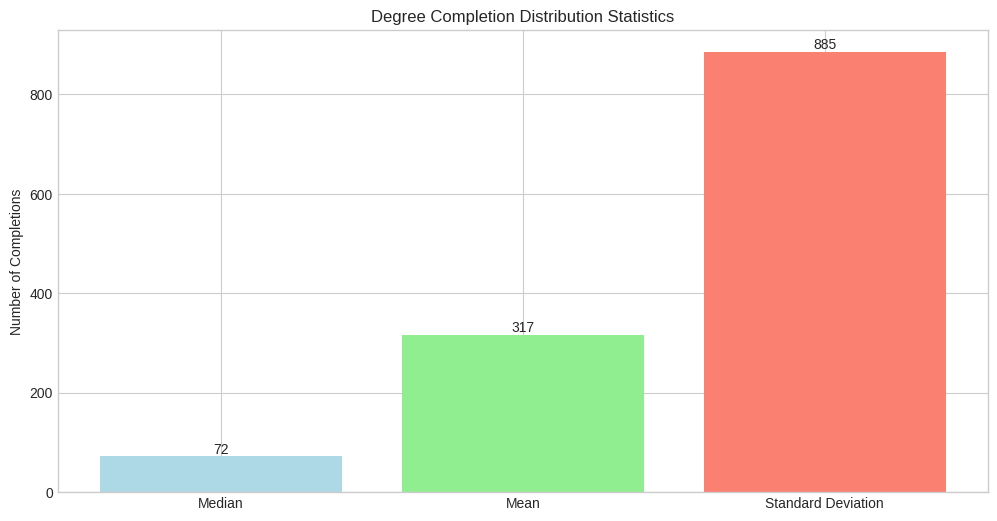

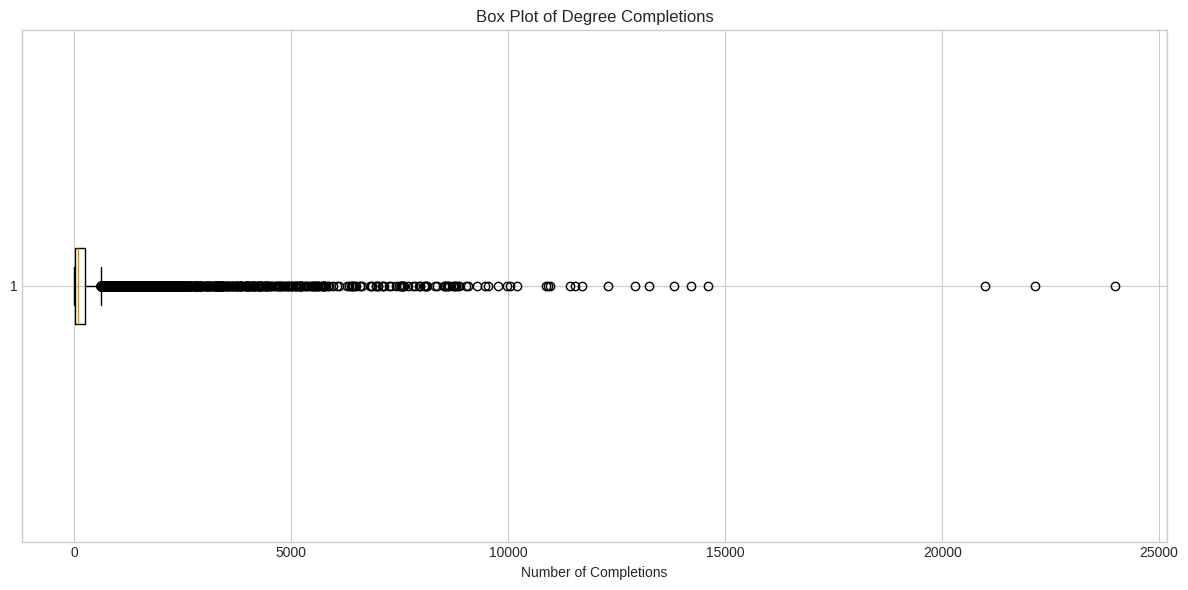

In [ ]:
# Create visualization for degree completion distribution statistics
fig, ax = plt.subplots(figsize=(12, 6))

# Data points
stats = {
   'Median': 72,
   'Mean': 317,
   'Standard Deviation': 885
}

# Create bar plot
plt.bar(stats.keys(), stats.values(), color=['lightblue', 'lightgreen', 'salmon'])

# Add value labels on top of bars
for i, v in enumerate(stats.values()):
   plt.text(i, v, f'{int(v)}', ha='center', va='bottom')

plt.title('Degree Completion Distribution Statistics')
plt.ylabel('Number of Completions')

# Add a box plot to show distribution
plt.figure(figsize=(12, 6))
plt.boxplot(df_clean['CSTOTLT'], vert=False)
plt.title('Box Plot of Degree Completions')
plt.xlabel('Number of Completions')

plt.tight_layout()
plt.show()

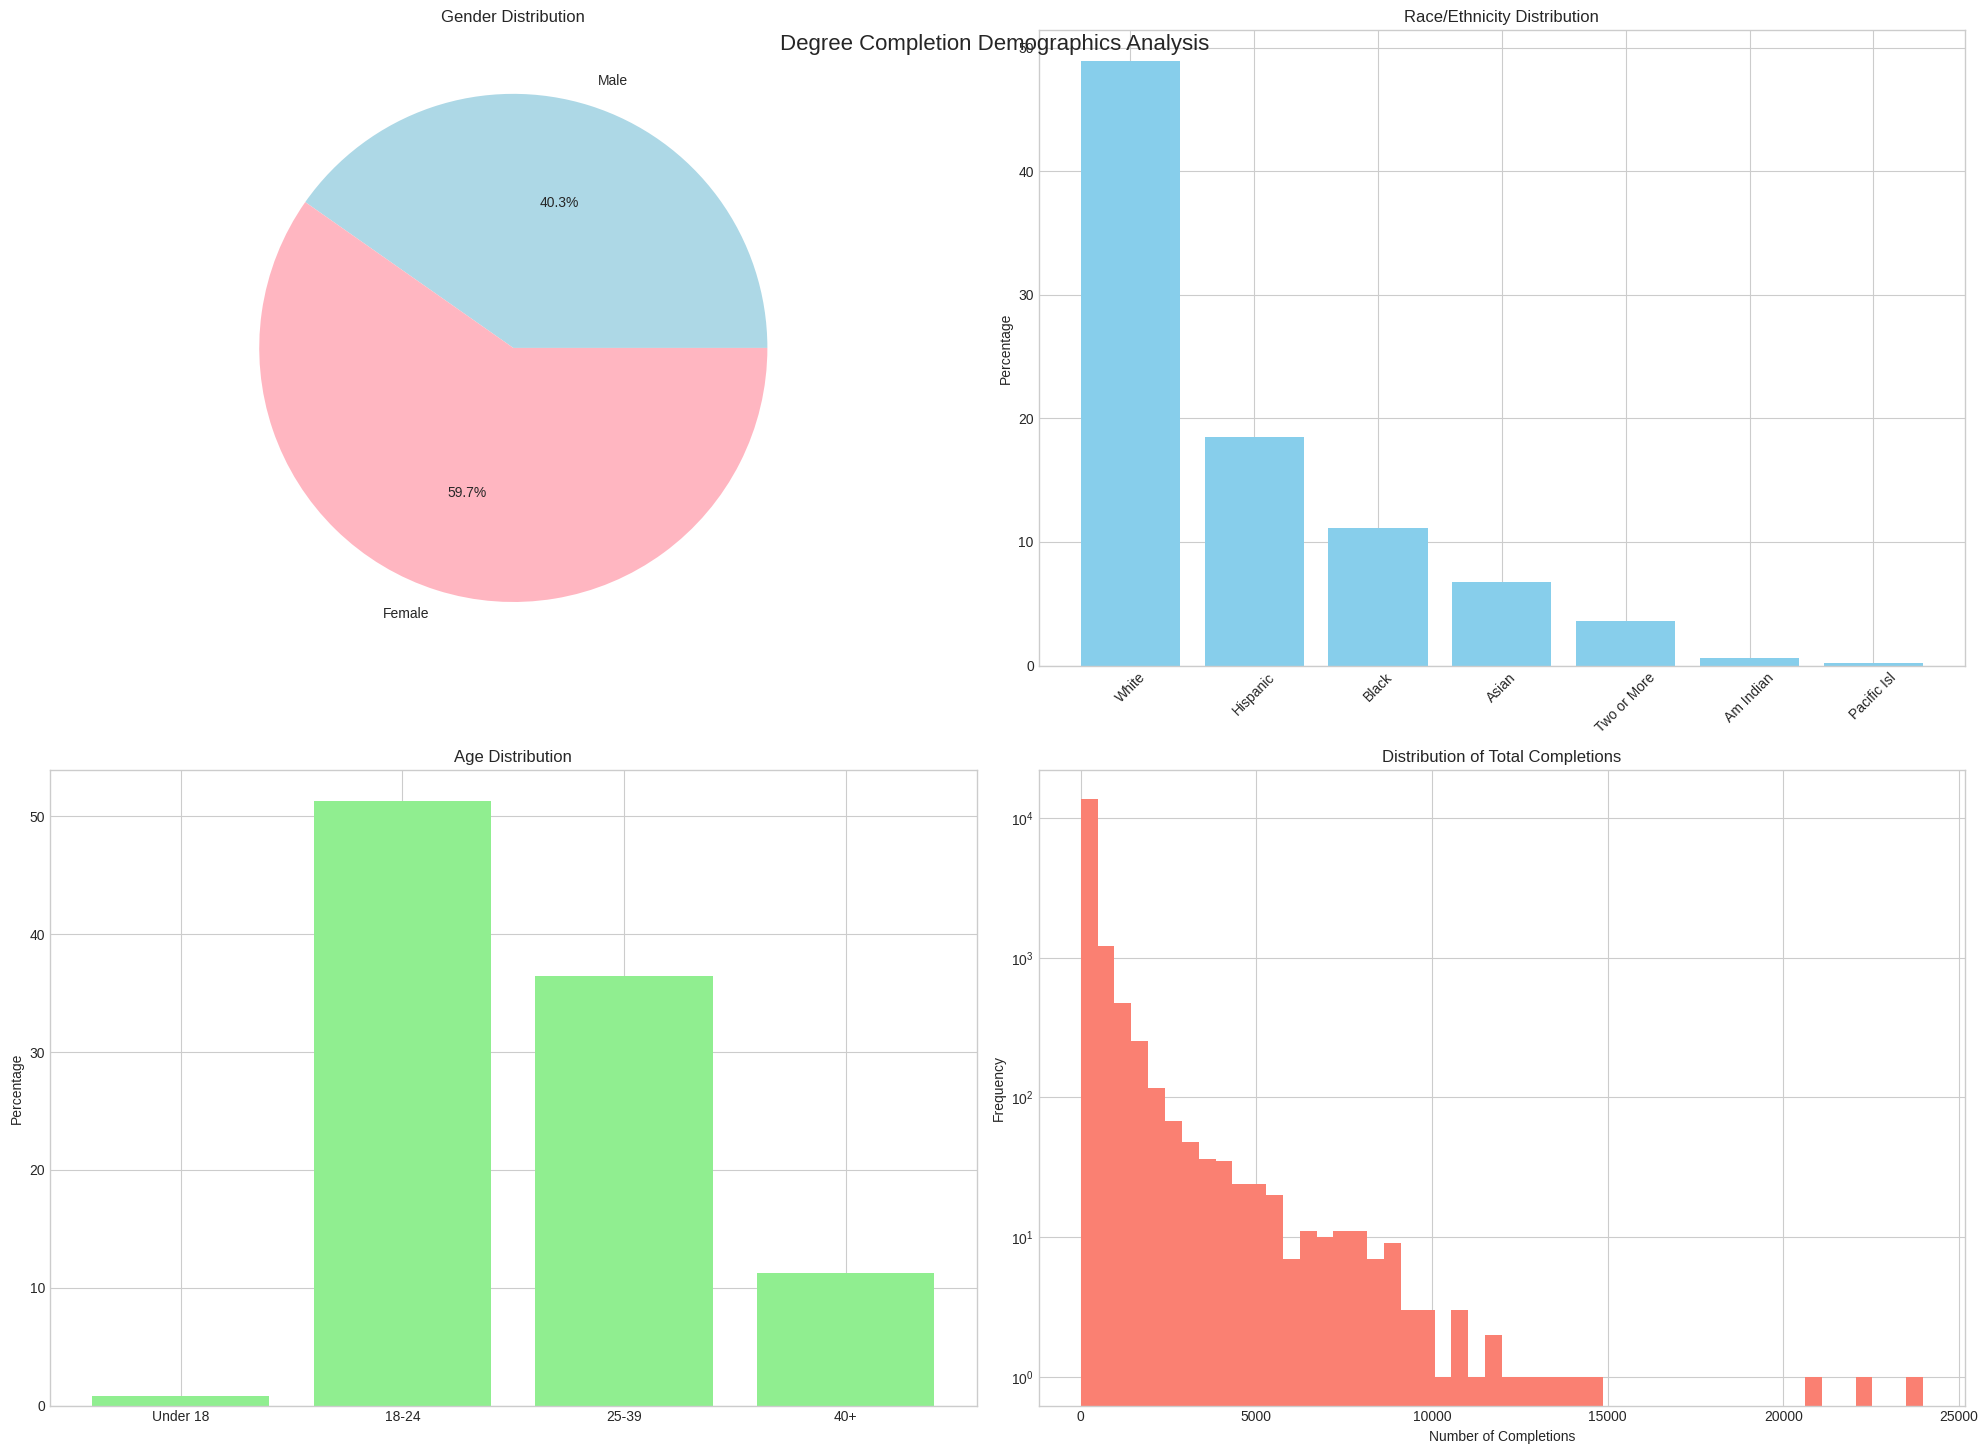

In [ ]:
# Create visualization subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Degree Completion Demographics Analysis', fontsize=16, y=0.95)

# 1. Gender Distribution
gender_data = [40.27, 59.73]  # From our statistics
axes[0,0].pie(gender_data, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
axes[0,0].set_title('Gender Distribution')

# 2. Race/Ethnicity Distribution
race_data = {
   'White': 48.95,
   'Hispanic': 18.49,
   'Black': 11.15,
   'Asian': 6.76,
   'Two or More': 3.57,
   'Am Indian': 0.59,
   'Pacific Isl': 0.24
}
axes[0,1].bar(race_data.keys(), race_data.values(), color='skyblue')
axes[0,1].set_title('Race/Ethnicity Distribution')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_ylabel('Percentage')

# 3. Age Distribution
age_data = {
   'Under 18': 0.79,
   '18-24': 51.34,
   '25-39': 36.47,
   '40+': 11.28
}
axes[1,0].bar(age_data.keys(), age_data.values(), color='lightgreen')
axes[1,0].set_title('Age Distribution')
axes[1,0].set_ylabel('Percentage')

# 4. Total Completions Distribution
axes[1,1].hist(df_clean['CSTOTLT'], bins=50, color='salmon')
axes[1,1].set_title('Distribution of Total Completions')
axes[1,1].set_xlabel('Number of Completions')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_yscale('log')  # Using log scale due to right skew

plt.tight_layout()
plt.show()

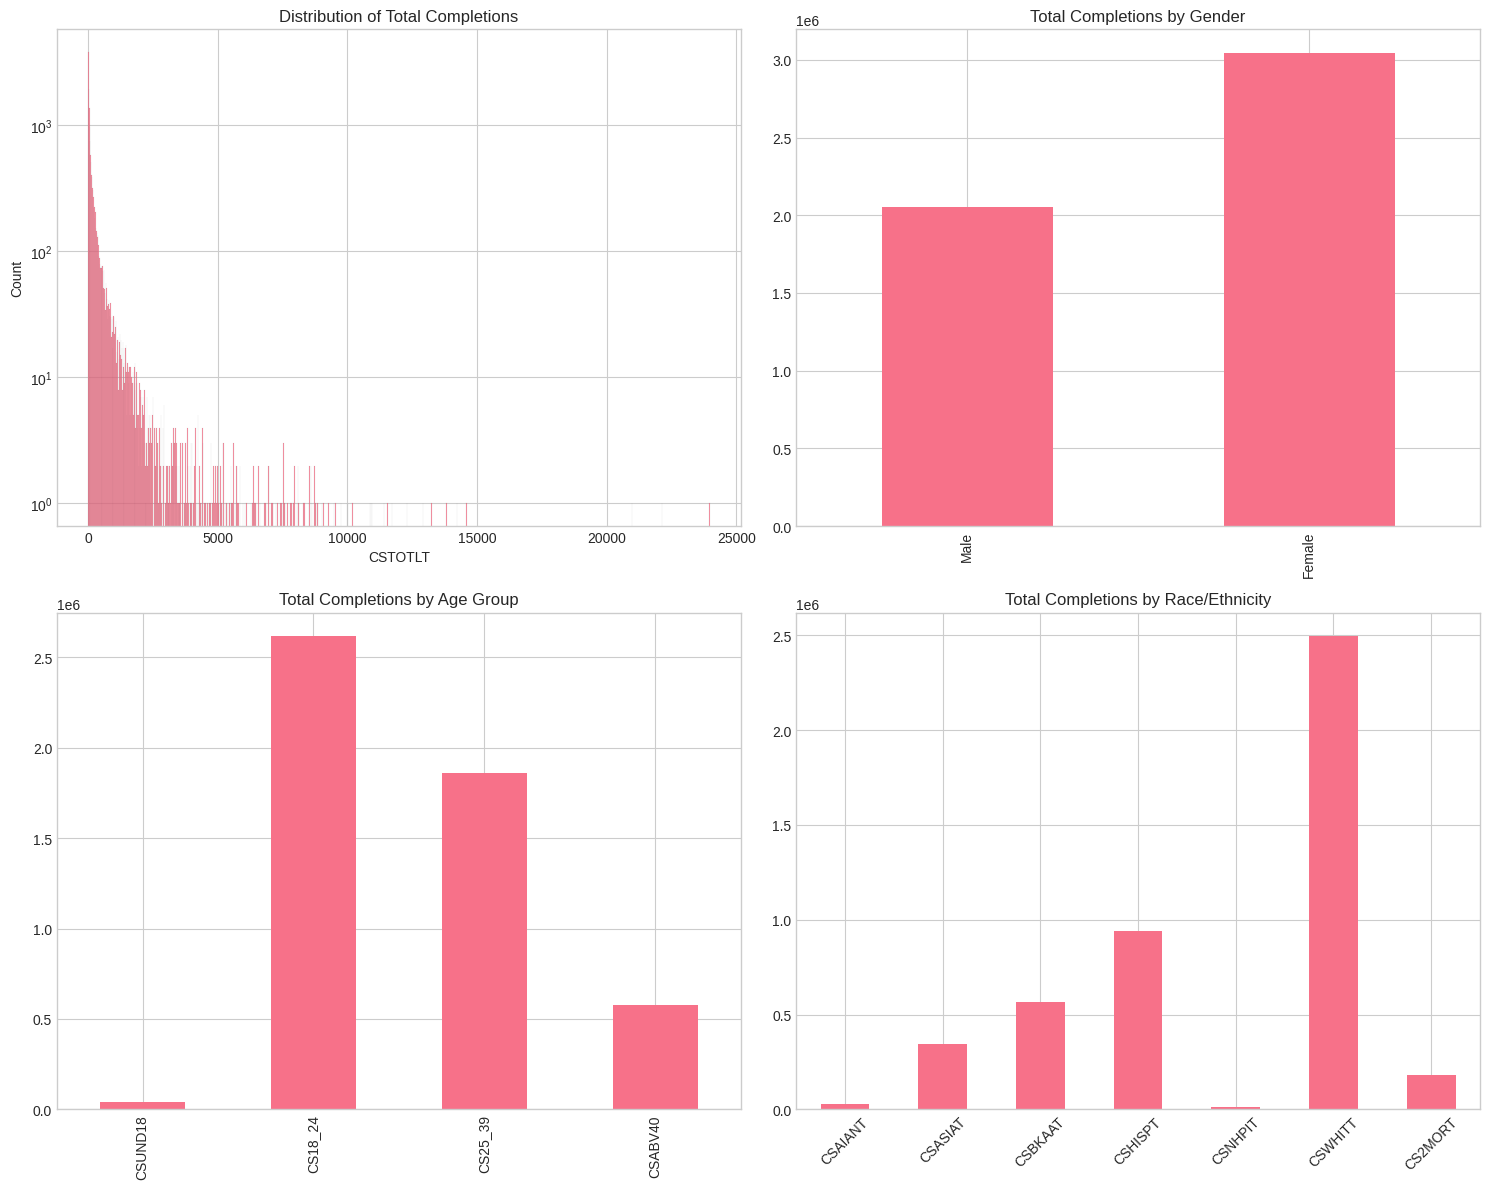

In [ ]:
# Initial Exploratory Data Analysis
def plot_basic_eda():
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Total completions distribution
    sns.histplot(data=df_clean, x='CSTOTLT', ax=axes[0,0])
    axes[0,0].set_title('Distribution of Total Completions')
    axes[0,0].set_yscale('log')

    # Gender comparison
    gender_totals = pd.Series({
        'Male': df_clean['CSTOTLM'].sum(),
        'Female': df_clean['CSTOTLW'].sum()
    })
    gender_totals.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Total Completions by Gender')

    # Age distribution
    age_cols = ['CSUND18', 'CS18_24', 'CS25_39', 'CSABV40']
    age_totals = df_clean[age_cols].sum()
    age_totals.plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Total Completions by Age Group')

    # Race/Ethnicity distribution
    race_cols = ['CSAIANT', 'CSASIAT', 'CSBKAAT', 'CSHISPT',
                 'CSNHPIT', 'CSWHITT', 'CS2MORT']
    race_totals = df_clean[race_cols].sum()
    race_totals.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Total Completions by Race/Ethnicity')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_basic_eda()

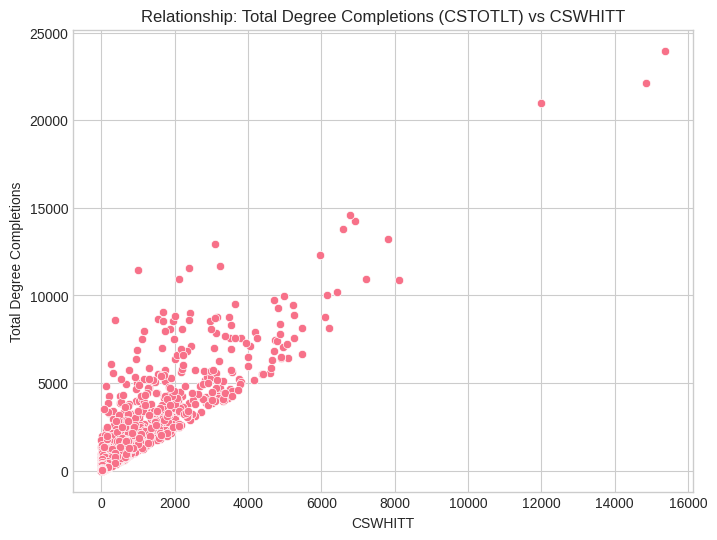

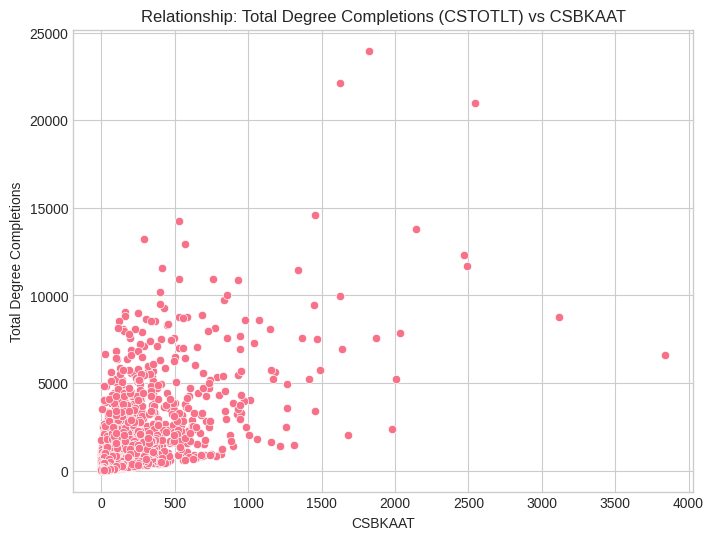

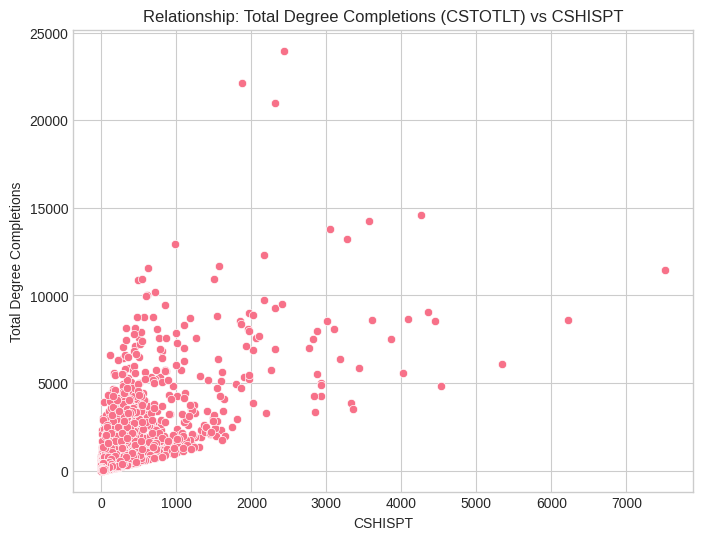

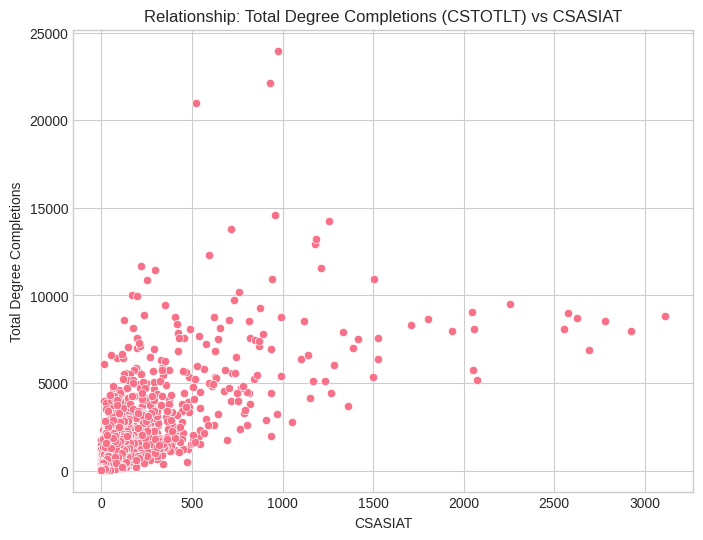

In [ ]:
# Scatter plot of total completions (CSTOTLT) vs demographic groups
demographic_vars = ['CSWHITT', 'CSBKAAT', 'CSHISPT', 'CSASIAT']
for col in demographic_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_clean[col], y=df_clean['CSTOTLT'])
    plt.title(f'Relationship: Total Degree Completions (CSTOTLT) vs {col}')
    plt.xlabel(col)
    plt.ylabel('Total Degree Completions')
    plt.show()


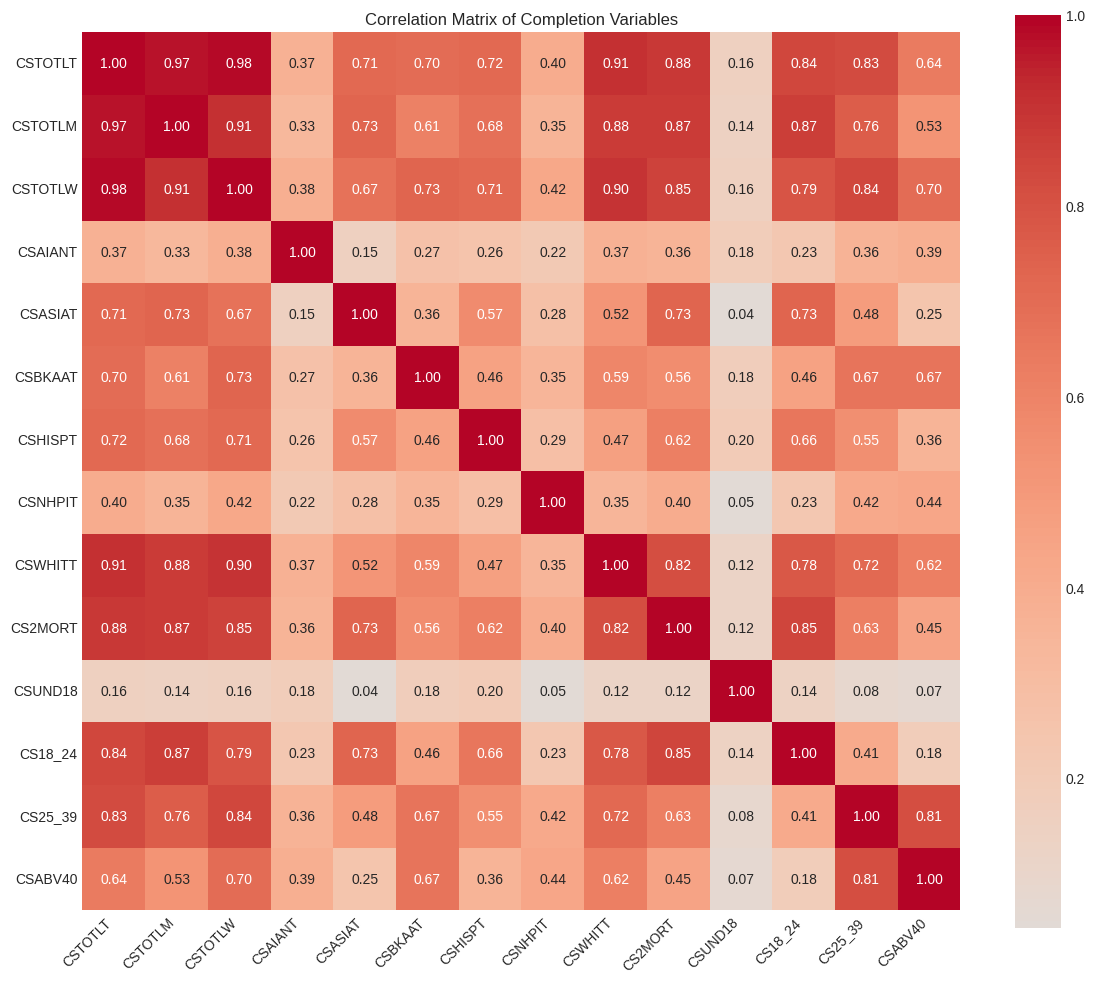

In [ ]:
 # Select numeric columns for correlation
numeric_cols = ['CSTOTLT', 'CSTOTLM', 'CSTOTLW', 'CSAIANT', 'CSASIAT',
               'CSBKAAT', 'CSHISPT', 'CSNHPIT', 'CSWHITT', 'CS2MORT',
               'CSUND18', 'CS18_24', 'CS25_39', 'CSABV40']

# Create correlation matrix
corr_matrix = df_clean[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
           annot=True,
           cmap='coolwarm',
           center=0,
           fmt='.2f',
           square=True)

plt.title('Correlation Matrix of Completion Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Model Building

#### Normalize Continuous variables and encode categorical variables

In [ ]:
# 1. Normalize continuous variables
from sklearn.preprocessing import StandardScaler

continuous_cols = ['CSTOTLT', 'CSTOTLM', 'CSTOTLW', 'CSAIANT', 'CSASIAT',
                  'CSBKAAT', 'CSHISPT', 'CSNHPIT', 'CSWHITT', 'CS2MORT',
                  'CSUND18', 'CS18_24', 'CS25_39', 'CSABV40']

scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[continuous_cols] = scaler.fit_transform(df_clean[continuous_cols])

# 2. Encode categorical variables
df_encoded = pd.get_dummies(df_scaled, columns=['AWLEVELC'], prefix=['Award_Level'])

Logistic Regression

In [ ]:
# Define predictors and target
X = df_encoded.drop(columns=['CSTOTLT'])  # Drop target variable
y = (df_clean['CSTOTLT'] >= df_clean['CSTOTLT'].median()).astype(int)  # Binary target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      2365
           1       0.98      0.95      0.97      2455

    accuracy                           0.97      4820
   macro avg       0.97      0.97      0.97      4820
weighted avg       0.97      0.97      0.97      4820

Accuracy: 0.9651452282157676


Coefficient Analysis


Feature Importance Analysis:
    Feature  Coefficient
8   CSWHITT     9.828559
2   CSTOTLW     8.703715
5   CSBKAAT     8.387998
14  CS25_39     7.784160
6   CSHISPT     7.727609
1   CSTOTLM     6.916899
15  CSABV40     5.951477
13  CS18_24     5.872082
9   CS2MORT     5.527913
12  CSUND18     4.589472


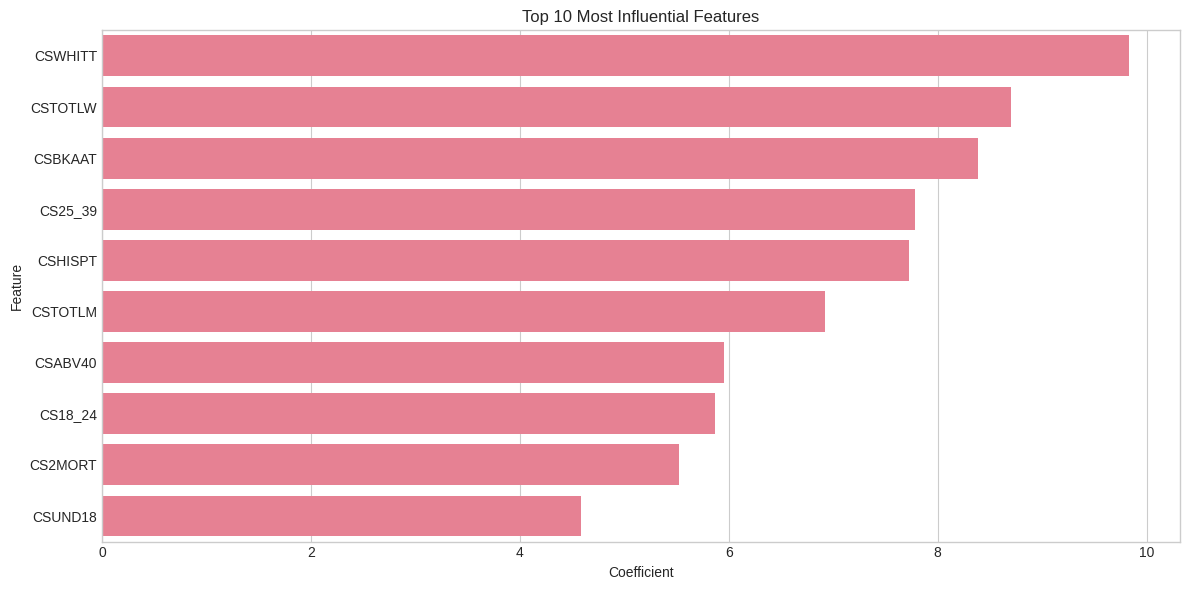

In [ ]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0],
    'Abs_Coefficient': abs(log_model.coef_[0])
})

# Sort by absolute coefficient value
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display top features
print("\nFeature Importance Analysis:")
print(feature_importance[['Feature', 'Coefficient']].head(10))

# Visualize top 10 features
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='Coefficient', y='Feature')
plt.title('Top 10 Most Influential Features')
plt.xlabel('Coefficient')
plt.tight_layout()
plt.show()


Decision Tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2365
           1       1.00      0.99      0.99      2455

    accuracy                           0.99      4820
   macro avg       0.99      0.99      0.99      4820
weighted avg       0.99      0.99      0.99      4820

Decision Tree Accuracy: 0.9925311203319502


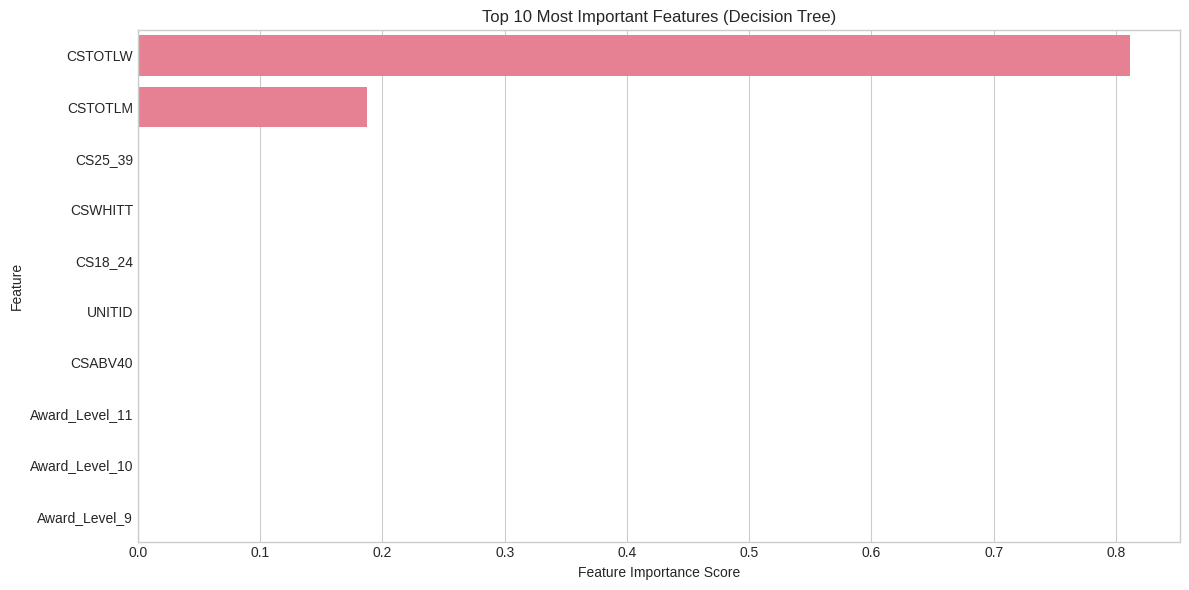

In [ ]:
 # Train a decision tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Initial depth = 5
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Analyze feature importance
dt_feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
dt_feature_importances = dt_feature_importances.sort_values(ascending=False)

# Visualize top features
plt.figure(figsize=(12, 6))
sns.barplot(x=dt_feature_importances.head(10), y=dt_feature_importances.head(10).index)
plt.title('Top 10 Most Important Features (Decision Tree)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



Tuning Hyperparameters for Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_dt = {
    'max_depth': [3, 5, 10, 20],  # Experiment with different tree depths
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5]  # Minimum samples required at a leaf node
}

# Grid search for decision tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters (Decision Tree):", grid_search_dt.best_params_)
best_dt_model = grid_search_dt.best_estimator_

# Evaluate the tuned model
y_pred_best_dt = best_dt_model.predict(X_test)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dt))


Best Parameters (Decision Tree): {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.9962655601659751


Decision Tree : Feature Importance Analysis

Top 10 Feature Importances (Decision Tree):
CSTOTLW           0.806768
CSTOTLM           0.189932
CS18_24           0.001441
UNITID            0.000776
CS25_39           0.000533
CSWHITT           0.000521
CSHISPT           0.000029
CSUNKN            0.000000
Award_Level_11    0.000000
Award_Level_10    0.000000
dtype: float64


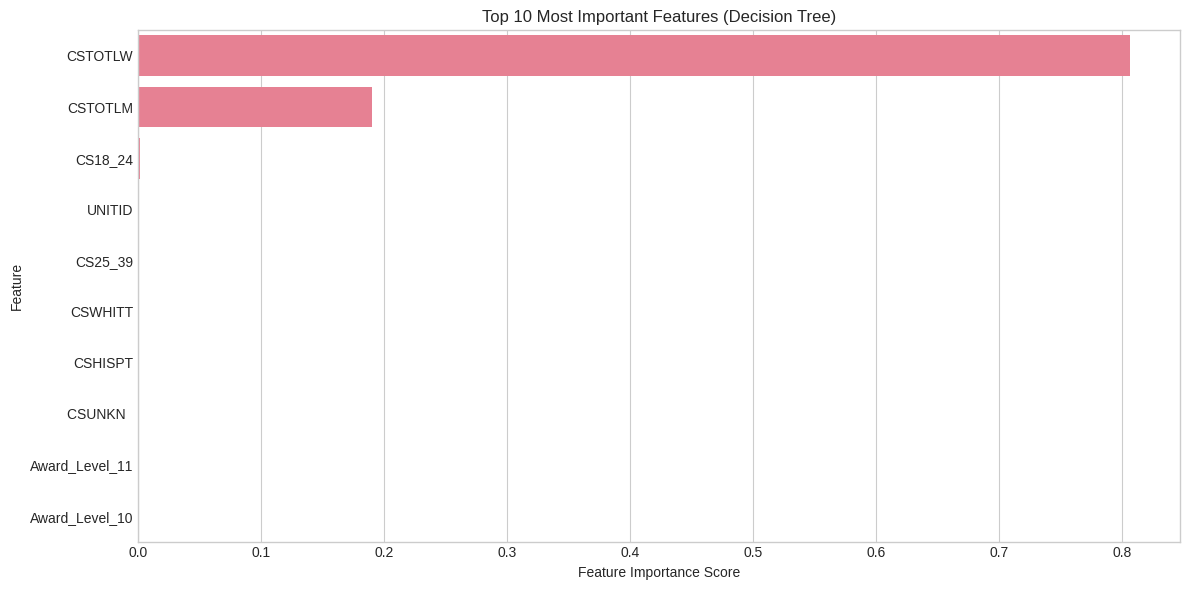

In [ ]:
# Analyze feature importances
dt_feature_importances = pd.Series(best_dt_model.feature_importances_, index=X.columns)  # Use the tuned model
dt_feature_importances = dt_feature_importances.sort_values(ascending=False)

# Display the top features
print("Top 10 Feature Importances (Decision Tree):")
print(dt_feature_importances.head(10))

# Visualize the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=dt_feature_importances.head(10), y=dt_feature_importances.head(10).index)
plt.title('Top 10 Most Important Features (Decision Tree)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Random Forest

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Random Forest: 0.9937759336099585
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2365
           1       0.99      0.99      0.99      2455

    accuracy                           0.99      4820
   macro avg       0.99      0.99      0.99      4820
weighted avg       0.99      0.99      0.99      4820



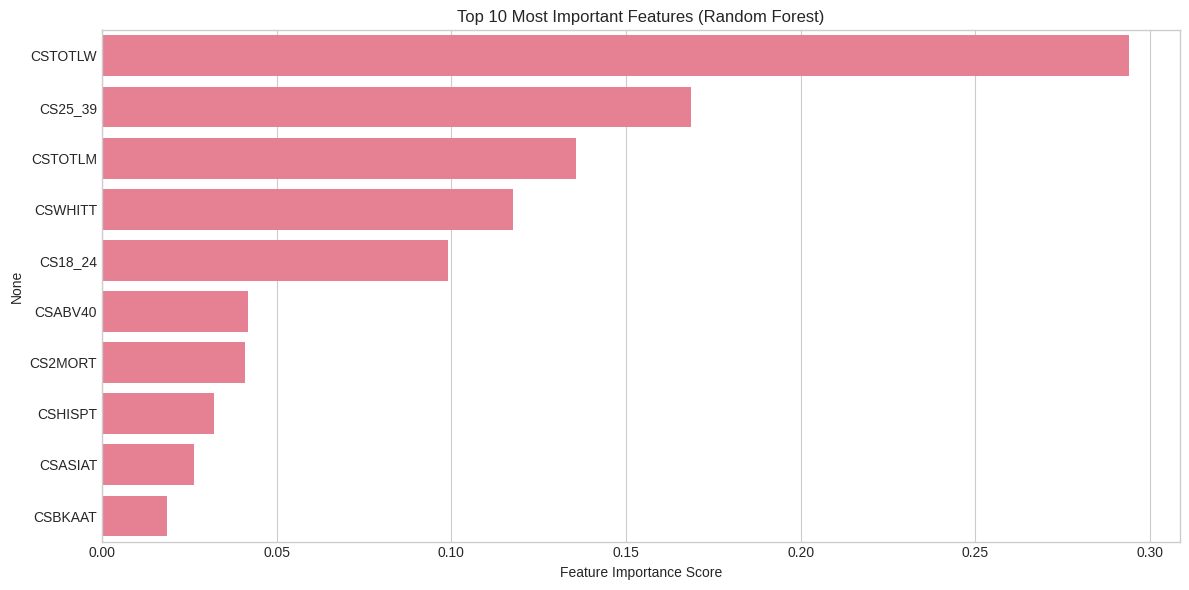

In [ ]:
# Random forest with hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))

print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

rf_feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
rf_feature_importances = rf_feature_importances.sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=rf_feature_importances.head(10), y=rf_feature_importances.head(10).index)
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()


Decision tree with K-fold Cross-Validation

In [ ]:

# Initialize the tuned decision tree model
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=2, random_state=42)

# Perform 5-fold cross-validation
k = 5
cv_scores_dt = cross_val_score(dt_model, X, y, cv=k, scoring='accuracy')

# Display results
print(f"Decision Tree Cross-Validation Scores ({k}-fold): {cv_scores_dt}")
print(f"Decision Tree Mean Accuracy: {cv_scores_dt.mean():.4f}")

Decision Tree Cross-Validation Scores (5-fold): [0.9956427  0.99657641 0.99595394 0.99470899 0.5664488 ]
Decision Tree Mean Accuracy: 0.9099


Randome Forest with 5-fold Cross-Validation

In [ ]:
# Initialize the tuned random forest model
rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=15, min_samples_leaf=2, min_samples_split=5, random_state=42
)

# Perform 5-fold cross-validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=k, scoring='accuracy')

# Display results
print(f"Random Forest Cross-Validation Scores ({k}-fold): {cv_scores_rf}")
print(f"Random Forest Mean Accuracy: {cv_scores_rf.mean():.4f}")


Random Forest Cross-Validation Scores (5-fold): [0.98817305 0.99346405 0.99502023 0.98941799 0.96389667]
Random Forest Mean Accuracy: 0.9860
